# TITLE :

# BUSINESS UNDERSTANDING

## DESCRIPTION:
Customer churn is the rate at which a customer stops using the services of an organisation or a company or will want to leave in future. It can also be defined as the likelihood of a customer to switch from service provider to another.
 A customer may be dissatisfied with the product experience due to various reasons such as;

	1.Product cost outweighing the value it delivers

	2. Inadequate customer for use of product 

	3. Customers attracted to product use may not be the right choice for the product and many more.

To gain new customers in an organisation often incurs more cost compared to selling to current customers. As such, it will be important to predict the churn rates of customers to assist in identifying potential customers who might want to leave. Companies that can identify customers who are at high risk of leaving will focus on their efforts and incentives of retaining those specific customers. It will also help to create appropriate marketing strategies to retain customers.


## Data Dictionary

The following describes the columns present in the data.

Gender -- Whether the customer is a male or a female

SeniorCitizen -- Whether a customer is a senior citizen or not

Partner -- Whether the customer has a partner or not (Yes, No)

Dependents -- Whether the customer has dependents or not (Yes, No)

Tenure -- Number of months the customer has stayed with the company

Phone Service -- Whether the customer has a phone service or not (Yes, No)

MultipleLines -- Whether the customer has multiple lines or not

InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

MonthlyCharges -- The amount charged to the customer monthly

TotalCharges -- The total amount charged to the customer

Churn -- Whether the customer churned or not (Yes or No)

## AIM: To gain insights in the data by identifying factors of customer churn and developing a model that can predict a customer churn.

## HYPOTHESIS (Contract Lenght)
### Null Hypothesis:A  Customer's contract term do not affect churning rate.

### Alternative Hypothesis: Customers with shorter contract term affects churning rate.

## ANALYTICAL QUESTIONS
1. What is the total churning rate of the customers?
 
2. What is the total amount of money senior and non senior citizens are charged? 

3. what is the churning rate of senior citizens?

4. What is the most used payment method for customers?

5. Does contract term of a customer affect churning rate?

6. Is there a difference in churn rate amongst males and females?

7. Do customers with dependants have a shorter contract term?

# DATA UNDERSTANDING

 ## Importation

In [ ]:
#Installing neccesary packages

#Installing a pacakge for creating connection strings to a remote database and another package for creating an enviroment to hide sensitive config info
%pip install pyodbc
%pip install python-dotenv
%pip install openpyxl


#Data Handling packages
%pip install pandas
%pip install numpy

#Visualiztion packages
%pip install matplotlib
%pip install seaborn

#Package for statitics 
%pip install scipy

#Package for modeling
%pip install scikit-learn

#Package for balancing dataset
%pip install imbalanced-learn


In [3]:
#Importing all necessary packages
import pyodbc

#import the dotenv_values function from the dotenv package
from dotenv import dotenv_values

#importing data handling packages
import pandas as pd
import numpy as np 
 
#importing visualisation packages
import matplotlib.pyplot as mplot
import seaborn as sns

#importing statistical packages
from scipy.stats import chi2_contingency

#importing modeling packages
from sklearn.model_selection import train_test_split

#importing packages for preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import TransformerMixin

#Importing packages for ML Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Importing packages for balancing dataset
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

#Importing packages for ROC & AUC
from sklearn.metrics import roc_auc_score, auc, roc_curve
from sklearn.metrics import roc_curve, auc

#Packages for Feature Importance
from sklearn.feature_selection import SelectKBest, mutual_info_classif

#for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')




## Creating a connection by accessing a connection string with my defined environment variable

In [4]:
#Loading environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

#Getting the values for the credentials you set in the '.env' file
server = environment_variables.get('server_name')
database = environment_variables.get('database')
username = environment_variables.get('user')
password = environment_variables.get('password')

#Creating a connection string
connection_string = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

In [5]:
#establishing a connestion to the database using pyodbc library
connection = pyodbc.connect(connection_string)

## Loading dataset 1

In [6]:
#retrieving data from database
query = 'Select * From dbo.LP2_Telco_churn_first_3000'
first_data = pd.read_sql(query,connection)

In [7]:
#to see first 5 rows iin the data
first_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


## Exploring Data 1

In [8]:
#converting data into csv file
first_data.to_csv('first_data.csv', index=False)

#reading the csv file
first_data = pd.read_csv('first_data.csv')
first_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [9]:
#getting information about data
first_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [10]:
#viewing the number of columns and rows
first_data.shape

(3000, 21)

In [11]:
#checking for null values
first_data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [12]:
#checking for duplicated values
first_data.duplicated().sum()

0

In [13]:
#getting a summary statistic
first_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,3000,3000,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,3000,2,Male,1537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,3000,2,False,2525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,3000,2,False,1538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,3000,2,False,2070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,3000.0,NaN,NaN,NaN,32.527333,24.637768,0.0,9.0,29.0,56.0,72.0
PhoneService,3000,2,True,2731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,2731,2,False,1437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,3000,3,Fiber optic,1343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,2349,2,False,1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Loading Second dataset

In [14]:
#loading Second dataset
second_data = pd.read_csv('https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_LP2-Classifcation/main/LP2_Telco-churn-second-2000.csv')
second_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


## Exploring Data 2

In [15]:
second_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [16]:
second_data.duplicated().sum()

0

In [17]:
second_data.shape

(2043, 21)

In [18]:
#checking for column headings
second_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
#Concatinating the two dataset
Final_data = pd.concat([first_data,second_data],axis=0)
Final_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [20]:
Final_data.to_csv('Concatenated Dataset.csv')

In [21]:
Final_data.shape

(5043, 21)

In [22]:
#Checking info of final data
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [23]:
#checking for null values
Final_data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [24]:
#checking for duplicates
Final_data.duplicated().sum()

0

In [25]:
#checking for column names for uniformity in column names
Final_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [26]:
#checking for unique values for categorical variables
Unique_values = Final_data[['SeniorCitizen','Partner','Dependents','PaperlessBilling','MultipleLines','OnlineSecurity','OnlineBackup','StreamingMovies','StreamingTV','Churn']].unstack().unique()
Unique_values
#Final_data['gender'].unique()

array([False, True, 'No', 'Yes', nan, 'No phone service',
       'No internet service'], dtype=object)

In [27]:
#Replacing some columns to bool in final dataset
Col_bool = ['TechSupport','DeviceProtection','Partner','Dependents','PaperlessBilling','MultipleLines','OnlineSecurity','OnlineBackup','StreamingMovies','StreamingTV']
Final_data[Col_bool] = Final_data[Col_bool].replace({ True:'Yes', False: 'No'})


In [28]:
#Checking if column datatype has been changed to bool
changed_Unique_values = Final_data[['Partner','Dependents','PaperlessBilling','MultipleLines','OnlineSecurity','OnlineBackup','StreamingMovies','StreamingTV','Churn']].unstack().unique()
changed_Unique_values

array(['Yes', 'No', nan, 'No phone service', 'No internet service', False,
       True], dtype=object)

In [29]:
#checking for unique values in SeniorCitizen column
Final_data['SeniorCitizen'].unique()


array([False, True], dtype=object)

In [30]:
#changing unique values in Senior citizens to 0s and 1
Final_data['SeniorCitizen'].replace({True:1, False:0})

0       0
1       0
2       0
3       0
4       0
       ..
2038    0
2039    0
2040    0
2041    1
2042    0
Name: SeniorCitizen, Length: 5043, dtype: int64

In [31]:
#checking for datatype of total monthly charges in final data
Final_data['TotalCharges'].info()

<class 'pandas.core.series.Series'>
Index: 5043 entries, 0 to 2042
Series name: TotalCharges
Non-Null Count  Dtype 
--------------  ----- 
5038 non-null   object
dtypes: object(1)
memory usage: 207.8+ KB


In [32]:
#changing the total charge data type from object to float
Final_data['TotalCharges']=pd.to_numeric(Final_data['TotalCharges'], errors='coerce').astype('float')

In [33]:
#Checking if the datatype of total charges to changed to 
Final_data['TotalCharges'].dtype

dtype('float64')

In [34]:
#checking for unique values in Dependents column
Final_data['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [35]:
#checking for unique values in PhoneService column
Final_data['PhoneService'].unique()

array([False, True, 'Yes', 'No'], dtype=object)

In [36]:
#Since the unique vales of the PhoneService column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No

# Mapping dictionary to replace values
mapping = {True:'Yes',False:'No'}

# Replacing values based on assumptions
Final_data['PhoneService'] = Final_data['PhoneService'].replace(mapping)
Final_data['PhoneService'].unique()


array(['No', 'Yes'], dtype=object)

In [37]:
#checking for unique values in Contract column
Final_data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [38]:
#checking for unique values in Churn column
Final_data['Churn'].unique()

array([False, True, nan, 'No', 'Yes'], dtype=object)

In [39]:
#Since the unique vales of the Churn column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No

# Mapping dictionary to replace values
mapping = {True: 'Yes', False: 'No'}

# Replacing values based on assumptions
Final_data['Churn'] = Final_data['Churn'].replace(mapping)
Final_data['Churn'].unique()


array(['No', 'Yes', nan], dtype=object)

In [40]:
#checking for unique values in MultipleLines column
Final_data['MultipleLines'].unique()

array([nan, 'No', 'Yes', 'No phone service'], dtype=object)

In [41]:
#dropping customer id column
#Final_data= Final_data.drop(['customerID'],axis=1)


In [42]:
#getting a summary statistic of final data
Final_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,5043,5043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,5043,2,Male,2559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,5043,2,False,4224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,5043,2,No,2585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,5043,2,No,3482,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,5043.0,NaN,NaN,NaN,32.576641,24.529807,0.0,9.0,29.0,56.0,72.0
PhoneService,5043,2,Yes,4554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,4774,3,No,2424,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,5043,3,Fiber optic,2248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,4392,3,No,2507,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Univariate Analysis

### Histogram for Numerical data

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

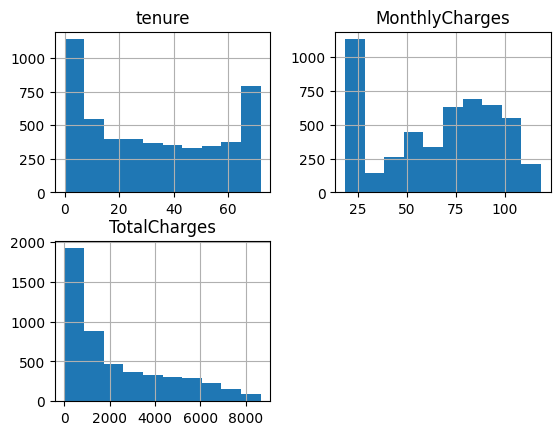

In [43]:
Final_data.hist()

<Axes: ylabel='MonthlyCharges'>

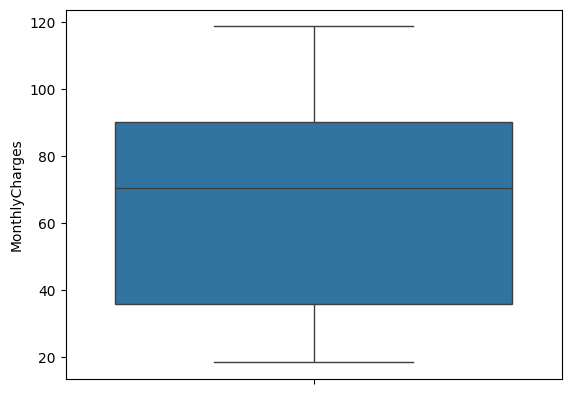

In [44]:
sns.boxplot(Final_data['MonthlyCharges'])

### Distribution of Gender

In [45]:
#getting a count of unique value in gender column
Gender_count = Final_data['gender'].value_counts()
Gender_count

gender
Male      2559
Female    2484
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

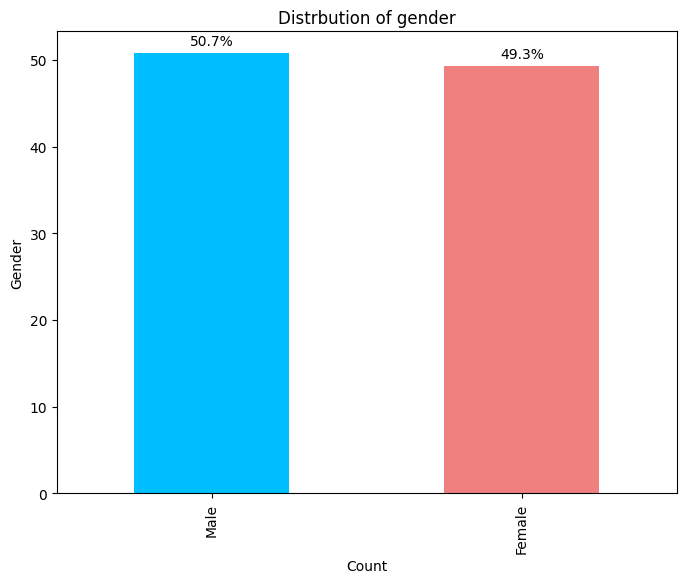

In [46]:
#converting count into % 
Gender_count = Final_data['gender'].value_counts(normalize=True)*100
Gender_count

# Adding text annotations with percentages on top of each bar
ax = Gender_count.plot(kind ='bar', figsize=(8,6), color = ['deepskyblue','lightcoral'])
for i, v in enumerate(Gender_count):
    ax.text(i, v + 1, f'{v:.1f}%', color='black', ha='center')

#plotting a bar chart to show distribution of gender
mplot.title('Distrbution of gender')
mplot.xlabel('Count')
mplot.ylabel('Gender')
mplot.show


* The difference in the proportion of males to females was less than 2% of the data. 
* The number of males were 2559 accounting to 50.7% and females were 2484 accounting to 49.3% of the dataset
  

### Distribution of InternetService

In [47]:
#Getting the count of unique values of internet service providers (ISP)
Final_data['InternetService'].value_counts()

InternetService
Fiber optic    2248
DSL            1715
No             1080
Name: count, dtype: int64

In [48]:
#finding types of internet service providers (ISP)
Final_data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

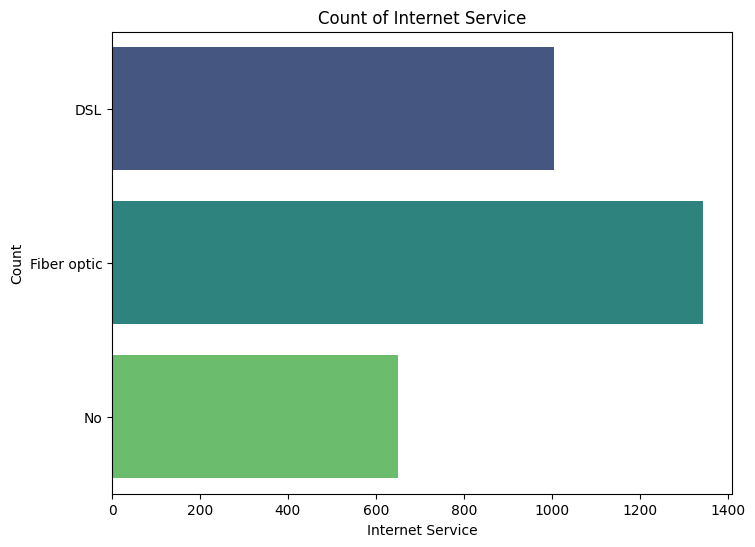

In [49]:
# Count plot for Internet Service

mplot.figure(figsize=(8, 6))
sns.countplot(first_data['InternetService'], palette='viridis')
mplot.title('Count of Internet Service')
mplot.xlabel('Internet Service')
mplot.ylabel('Count')
mplot.show()

Fiber optic    2248
DSL            1715
No             1080

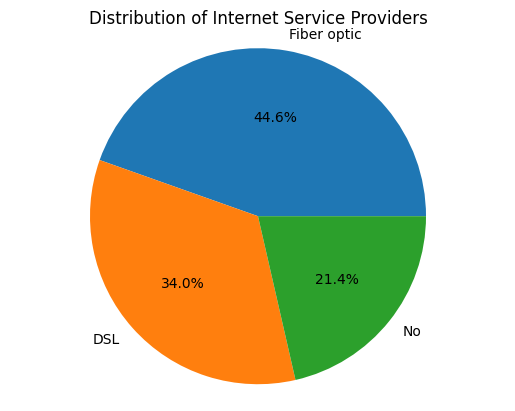

In [50]:
#getting a count of each Internet Service Provider(ISP)
ISP_count = Final_data['InternetService'].value_counts()
ISP_count

#Plotting a pie chart to get a distribution of the service providers
#colors=[('cyan', 'grey', 'rosybrown')]
mplot.pie(ISP_count, labels=ISP_count.index, autopct='%1.1f%%')
mplot.title('Distribution of Internet Service Providers')

#Ensuring pie is drawn as a cirlce
mplot.axis('equal')

#show pie chart
mplot.show()


### Distribution of contract type

In [51]:
first_data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [52]:
Final_data['Contract'].value_counts()

Contract
Month-to-month    2744
Two year          1244
One year          1055
Name: count, dtype: int64

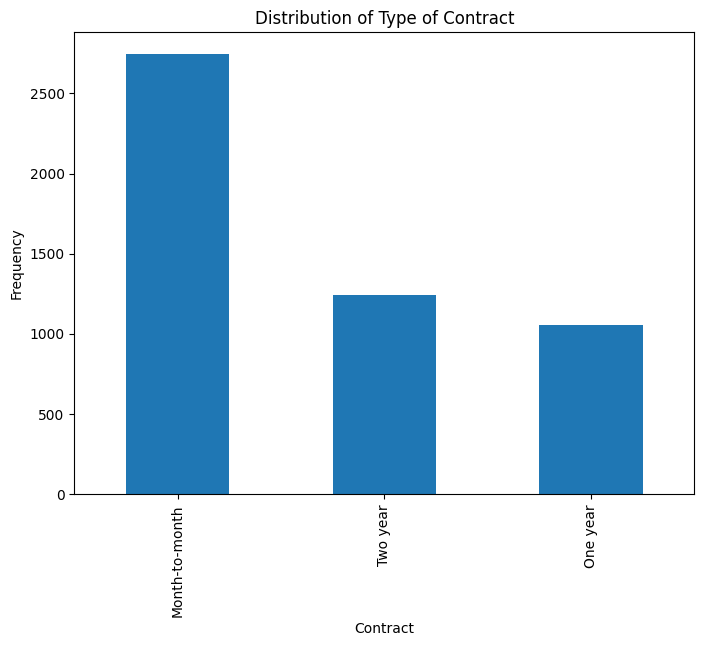

In [53]:
#plot showing count of type of contract for customers
Contract = Final_data['Contract'].value_counts()
sns.color_palette("rocket", as_cmap=True)
Contract.plot(kind = 'bar', figsize =(8,6))
mplot.title('Distribution of Type of Contract')
mplot.xlabel('Contract')
mplot.ylabel('Frequency')
mplot.show()

### Distribution of Tenure

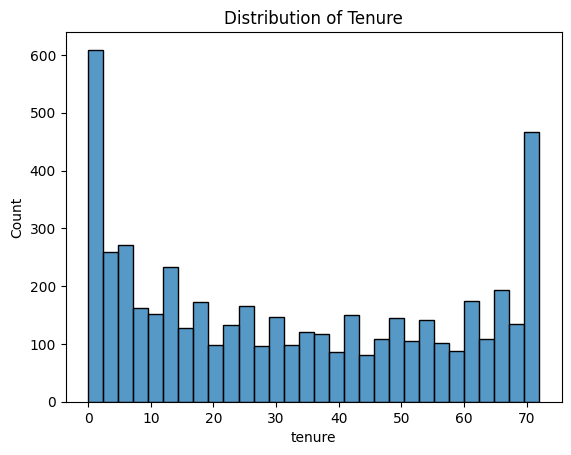

In [54]:
#Showing distribution of tenure using histogram
sns.histplot(Final_data['tenure'], bins=30)
mplot.title('Distribution of Tenure')
mplot.show()

## BI-VARIATE ANALYSIS

In [55]:
correlation = Final_data.corr(numeric_only = True)
correlation

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.240645,0.826264
MonthlyCharges,0.240645,1.000000,0.647007
TotalCharges,0.826264,0.647007,1.000000


<Axes: >

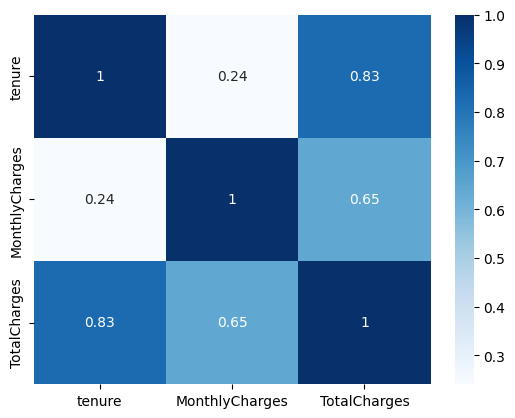

In [56]:
sns.heatmap(data=correlation, annot=True, cmap='Blues')

* This shows there is a a strong positive relationship between the total amount charged to customers and the number of months they have been with the company.
* There is a positive correlation also between monthly charges and total charges however,correlation is not so strong as that of tenure.

In [57]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [ ]:
data = Final_data[["tenure","MonthlyCharges",'TotalCharges','Churn']]
mplot.figure(figsize=(10, 8))
sns.pairplot(data, palette={'Yes':'Firebrick', 'No':'blue'}, hue = 'Churn')
mplot.show()

### Checking for outliers in some columns

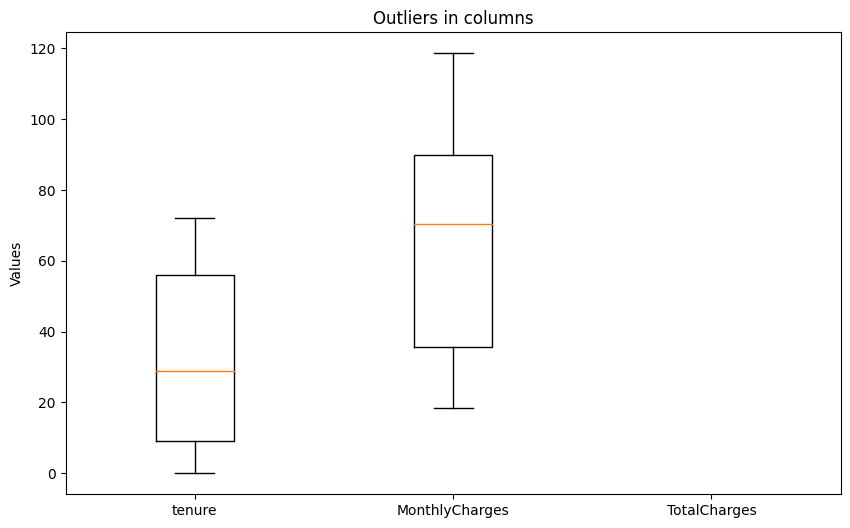

In [59]:
# Columns for outliers to be checked
outlier_columns = ['tenure','MonthlyCharges','TotalCharges']

#creating a box plot for columns
mplot.figure(figsize=(10,6))
mplot.boxplot(Final_data[outlier_columns].values,labels=outlier_columns)
mplot.title('Outliers in columns')
mplot.ylabel('Values')
mplot.show()


## ANALYTICAL QUESTIONS

# Q1. What is the total churning rate of the customers

In [60]:
#Count of churned customers and vice verca
churned_nonchurned = Final_data['Churn'].value_counts()
churned_nonchurned

Churn
No     3706
Yes    1336
Name: count, dtype: int64

Text(0.5, 1.0, 'Percentage of Churned and Non-churned customers ')

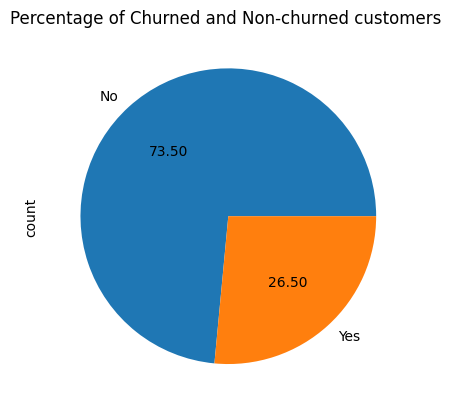

In [61]:
#Plotting a pie chat
churned_nonchurned.plot(kind='pie',autopct='%.2f')
mplot.title('Percentage of Churned and Non-churned customers ')


In [62]:
#Finding the percentage of churned customers
total_customers = Final_data['Churn'].count()
Churned_customers = Final_data['Churn'].value_counts().get('Yes', 0)
Churn_rate =( Churned_customers/ total_customers)*100
Churn_rate



26.497421658072195

* Approximately 26.49% of the customers churned based on the dataset.

# Q2. What is the total amount of money senior and non senior citizens are charged?

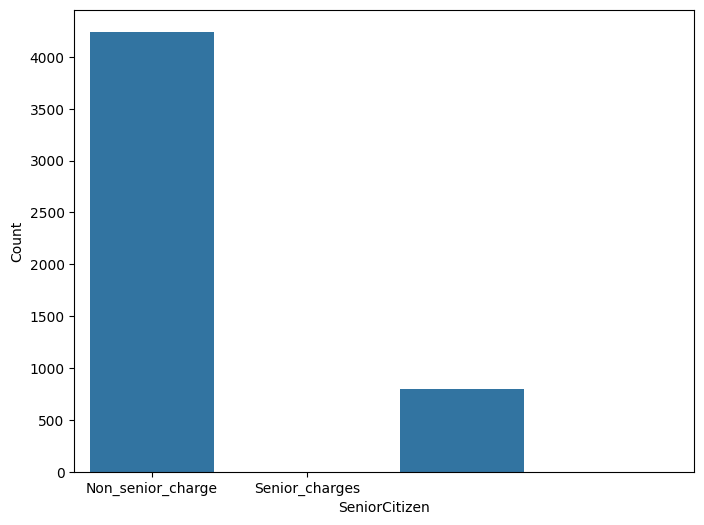

In [63]:
#Finding total monthly charges of unique vales of senior citizens
#Assuming senior citizens == 1
Senior_charges = Final_data[Final_data['SeniorCitizen']==1]['MonthlyCharges'].sum()

#Finding total monthly charges of unique vales of non-senior citizens
#Assuming senior citizens == 0
Non_senior_charges = Final_data[Final_data['SeniorCitizen']==0]['MonthlyCharges'].sum()

#Creating a countplot
mplot.figure(figsize=(8,6))
sns.countplot(data=Final_data, x='SeniorCitizen')
mplot.xlabel('SeniorCitizen')
mplot.ylabel('Count')
mplot.xticks(ticks=[0,1],labels=['Non_senior_charge','Senior_charges'])
mplot.show()


## Q3. what is the churning rate of senior citizens?

In [64]:
  # Calculate churn rate for senior citizens
senior_citizens = Final_data[Final_data['SeniorCitizen'] == 1]
senior_churn_count = senior_citizens['Churn'].value_counts().get('Yes', 0)
senior_total_customers = len(senior_citizens)

if senior_total_customers > 0:
    churn_rate_senior = (senior_churn_count / senior_total_customers) * 100
    print(f"The churn rate for senior citizens is {churn_rate_senior:.2f}%")
else:
    print("No senior citizens found in the dataset.")


The churn rate for senior citizens is 41.51%


In [65]:
Final_data['SeniorCitizen'].unique()

array([False, True], dtype=object)

In [66]:
Final_data['SeniorCitizen'].value_counts()

SeniorCitizen
False    4224
True      819
Name: count, dtype: int64

## Q4. Which is the most used payment method for customers?
### Which payment method has the highest churning rate?

In [67]:
##calculating for most used methods 
Most_payment_method = Final_data['PaymentMethod'].value_counts()
Most_payment_method


PaymentMethod
Electronic check             1700
Mailed check                 1128
Bank transfer (automatic)    1125
Credit card (automatic)      1090
Name: count, dtype: int64

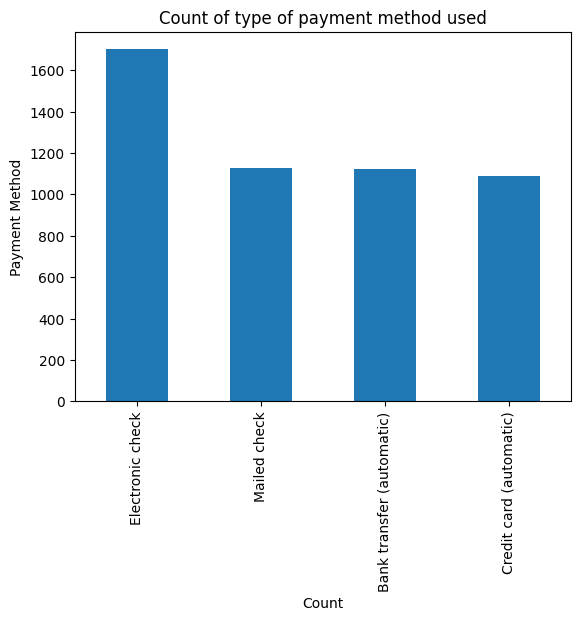

In [68]:
#Plotting a graph to show most common used Payment method
Most_payment_method.plot(kind='bar')
mplot.title('Count of type of payment method used')
mplot.xlabel('Count')
mplot.ylabel('Payment Method')
mplot.show()

* The most common used method of payment is Electronic check.

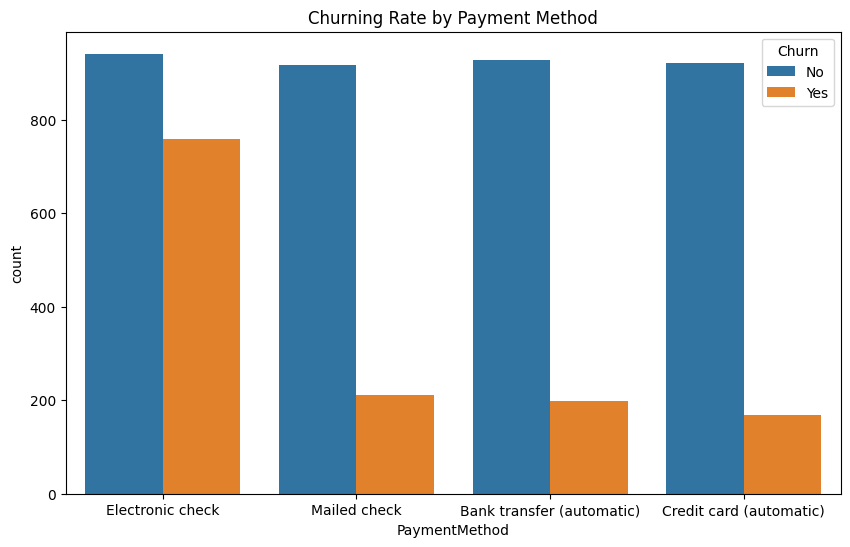

In [69]:
#To find highest churning rate of payament method.
mplot.figure(figsize=(10,6))
sns.countplot(x='PaymentMethod', hue='Churn', data=Final_data)
mplot.title('Churning Rate by Payment Method')
mplot.show()


* From the graph above it can be concluded that electronic check was the highest payment method and also the highest customer churn.

## Q5.  Does contract term of a customer affect churning rate?

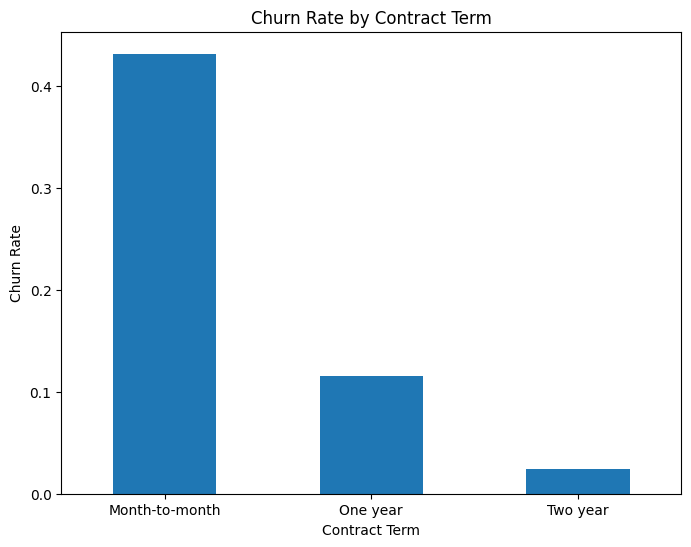

In [70]:
#Finding the churn rate for each contract term
Contract_churn_rate = Final_data.groupby('Contract')['Churn'].value_counts(normalize=True).loc[:,'Yes']

# Plotting a bar chart
mplot.figure(figsize=(8, 6))
Contract_churn_rate.plot(kind='bar')
mplot.xlabel('Contract Term')
mplot.ylabel('Churn Rate')
mplot.title('Churn Rate by Contract Term')
mplot.xticks(rotation=0)
mplot.show()

* The 'Month-to-Month' contract exhibited the highest churning rate at 0.176 surpassing the churn rate of the 'One Year' contract, which stood at 0.50.

* 'Two Year' contract demonstrated the lowest churn rate. This suggests that customers opting for longer-term contract might have a higher commitment level to the service compared to those choosing shorter-term agreements.

* Hence from the data table it shows that the contract term indeed has an influence on the churning rate."

# Q6.  Do customers with dependants have a shorter contract term?

## Hypothesis Testing


## HYPOTHESIS (Contract Lenght)
### Null Hypothesis:A  Customer's contract term do not affect churning rate.

### Alternative Hypothesis: Customers with shorter contract term affects churning rate.

In [71]:
# Selecting relevant columns (Contract and Churn)
payment_churn = Final_data[['Contract', 'Churn']]

# Creating a contingency table (cross-tabulation) between Contract and Churn
contingency_table = pd.crosstab(payment_churn['Contract'], payment_churn['Churn'])

# Performing chi-square test to determine correlation
chi2, p, dof, expected = chi2_contingency(contingency_table)

#With a significance value of
alpha = 0.05

# Displaying the chi-square statistic and p-value
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")


Chi-Square Statistic: 881.6208905118242
P-value: 3.61789584641233e-192


In [72]:
contingency_table

Churn,No,Yes
Contract,,
Month-to-month,1560,1184
One year,933,122
Two year,1213,30


* With an estimated p value of 3.61 and a significance level of 0.05, we fail to reject the null hypothesis and say that a customers contract term do not affects the churning rate of the service.
* Further analysis on specific contract terms could reveal strategies the service can put inplace to establish a stroger customer relationship which can improve longer commitment of customers. 

# DATA PREPARATION

## Split dataset into input(x) and output/target(y) features

In [73]:
#Defining x
x = Final_data.drop(['Churn','customerID'], axis=1)

In [74]:
#Defining y
y = Final_data['Churn']

In [75]:
#checking for data types of x columns
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   object 
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 
 17  

In [76]:
#Checking for null values in input data (x)
x.isna().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
dtype: int64

In [77]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   object 
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 
 17  

In [78]:
y.info()

<class 'pandas.core.series.Series'>
Index: 5043 entries, 0 to 2042
Series name: Churn
Non-Null Count  Dtype 
--------------  ----- 
5042 non-null   object
dtypes: object(1)
memory usage: 207.8+ KB


In [79]:
#checking for null values in output column(y)
y.isna().sum()

1

In [80]:
#defining mode value
most_frequent = y.mode()[0]

#Filling null values in y column with most frequent
y.fillna(most_frequent, inplace=True)

In [81]:
#Checking if null value has been replaced
y.isna().sum()

0

In [82]:
y.info()

<class 'pandas.core.series.Series'>
Index: 5043 entries, 0 to 2042
Series name: Churn
Non-Null Count  Dtype 
--------------  ----- 
5043 non-null   object
dtypes: object(1)
memory usage: 207.8+ KB


## Spliting Data into Train and Test

In [83]:

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state = 42, stratify=y)

## Feature Engineering

In [84]:
#Defining numeric columns
numeric_col = x.select_dtypes(include='number').columns
numeric_col

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [85]:
#Defining categorical columns
categorial_col = x.select_dtypes(include=object).columns
categorial_col

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

## Creating Pipelines

In [86]:
#logTransformer class
class LogTransformer():
    def __init__(self, constant=1e-5):
        self.constant = constant

    def fit(self, x, y=None):
        return self
    def transform (self,x):
        return np.log1p(x + self.constant)

#Creating a pipeline for numeric columns
numeric_pipelines = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('log_transformation', FunctionTransformer(LogTransformer().transform)),
    ('scaler', RobustScaler()),  
])


#categorical pipelines
categorical_pipelines = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),
])


 
#Combining preprocessors 
preprocessor = ColumnTransformer([
    ('numeric_pipelines',numeric_pipelines,numeric_col),
    ('categorical_pipelines',categorical_pipelines,categorial_col)
])

## Label Encoding

In [87]:
Label_encoder = LabelEncoder()
y_train_encoded = Label_encoder.fit_transform(y_train)
y_test_encoded = Label_encoder.transform(y_test)


## ML Pipeline  Unbalanced Data

### Decision Tree Model

In [88]:
#Craeting a decision tree model
from sklearn.tree import DecisionTreeClassifier

Decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

#Training/Fitting the model
Decision_tree_pipeline.fit(x_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipelines',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000028EE2F28FA0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'],...
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [89]:
##Evaluating the model
y_Decision_eval_predict = Decision_tree_pipeline.predict(x_test)

#Generating a classification report
Decision_report = classification_report(y_test_encoded, y_Decision_eval_predict)
print("Classification Report:\n", Decision_report)

#classification_rep = classification_report(y_eval_encoded, predictions)


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       742
           1       0.47      0.54      0.50       267

    accuracy                           0.71      1009
   macro avg       0.64      0.66      0.65      1009
weighted avg       0.73      0.71      0.72      1009



* Support shows us there were 742 instances in class 0 and 267 instances in class 1.
* Precision value tells us that the model is able to truely or accurately predict 82% of class 0.
* Recall value also tells us the model correctly identifies 78% of actual instances of the class 0.
* F1 score shows imbalancing of class 1 which may be a result of the model not correctly identifying more true values of class 1.
* This model performed better for class 0(No for churn) than 1(Yes for churn) by looking at the values for precision(82%), recall(78%) and f1-score(80%) for class 0.
 This may be as a result of support column of class 1 having lesser values than class 0. 
* To improve the performance of this model, it will be best to handle the imbalanced data, gather more data, adjust hyperparameters or evaluate other model performances.

### K-nearest neighbour model

In [90]:
#Creating a K-nearest neighbour model
 
RF_eval_predict = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())  
])

# Training/Fitting Model
RF_eval_predict.fit(x_train, y_train_encoded)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipelines',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000028EE2F28FA0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'],...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [91]:
##Evaluating the model
y_RF_eval_predict = RF_eval_predict.predict(x_test)

#Generating a classification report
RF_report = classification_report(y_test_encoded, y_RF_eval_predict)
print("Classification Report:\n", RF_report)

#classification_rep = classification_report(y_eval_encoded, predictions)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       742
           1       0.63      0.53      0.58       267

    accuracy                           0.79      1009
   macro avg       0.73      0.71      0.72      1009
weighted avg       0.78      0.79      0.79      1009



* This model can acacurately predict and identify 83% and 90% respectively of class 0.
* The high precision, recall and f1-score value of class 0 indicates that the model performs reasonably well than the decision tree model.
* Accuracy of the model is 79% which is higher than that of the decision tree model.
* However, there is room for improvement as the scores for class 1 seems lower whcih could be as a result of lower values of the support.

### Logistic regression model

In [92]:
#Creating a logistic regression model
Logistic_Reg_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier', LogisticRegression())
])

#Fitting/Training the pipeline on the training data
Logistic_Reg_pipeline.fit(x_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipelines',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000028EE2F28FA0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'],...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])

In [93]:
##Evaluating the model
y_LR_eval_predict = Logistic_Reg_pipeline.predict(x_test)

#Generating a classification report
LR_report = classification_report(y_test_encoded, y_LR_eval_predict)
print("Classification Report:\n", LR_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       742
           1       0.64      0.55      0.59       267

    accuracy                           0.80      1009
   macro avg       0.74      0.72      0.73      1009
weighted avg       0.79      0.80      0.79      1009



* This model performs better than the previous models by acheiving higher precision and recall scores.

### Gradient Booster Model

In [94]:
#Creating a Gradient booster model
Gradient_Boost_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier', GradientBoostingClassifier())
])

#Fitting/Training the pipeline of model
Gradient_Boost_pipeline.fit(x_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipelines',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000028EE2F28FA0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'],...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', GradientBoostingClassifier())])

In [95]:
#Evaluating the model
GB_eval_predict = Gradient_Boost_pipeline.predict(x_test)

#Generating a classification report
GB_report = classification_report(y_test_encoded,GB_eval_predict)
print("Classification Report:\n", GB_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       742
           1       0.63      0.55      0.59       267

    accuracy                           0.80      1009
   macro avg       0.74      0.72      0.73      1009
weighted avg       0.79      0.80      0.79      1009



* Shows comparable results with logistic regresion in precision and recall for both classes.

### Support Vector Machine

In [96]:
#Creating SVC Model
SvC_pipeline = Pipeline(steps=[
   ('preprocessor',preprocessor),
   ('classifier', SVC())
])

#Fitting/Training the model
SvC_pipeline.fit(x_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipelines',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000028EE2F28FA0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'],...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', SVC())])

In [97]:
#Comparing Models
models=[ 
    ('Decision_tree_classifier', DecisionTreeClassifier(random_state=42)),
    ('RF_classifier', RandomForestClassifier(random_state=42)),
    ('LR_classifier', LogisticRegression(random_state=42)),
    ('GB_classifier', GradientBoostingClassifier(random_state=42)),
    ('SVM_classifier', SVC(random_state=42)),
]
#Looping through models
for model_name, classifier in models:
    pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',classifier)
    ])
       

    #Fitting pipeline in training dataset
    pipeline.fit(x_train,y_train_encoded)

   #Making predictions on test data
    y_pred = pipeline.predict(x_test)
    
    print(f'Report for {model_name}')
    print(classification_report(y_pred, y_test_encoded))
    print('=' * 50)

Report for Decision_tree_classifier
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       702
           1       0.54      0.47      0.50       307

    accuracy                           0.71      1009
   macro avg       0.66      0.64      0.65      1009
weighted avg       0.70      0.71      0.71      1009

Report for RF_classifier
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       784
           1       0.53      0.63      0.57       225

    accuracy                           0.79      1009
   macro avg       0.71      0.73      0.72      1009
weighted avg       0.81      0.79      0.80      1009

Report for LR_classifier
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       779
           1       0.55      0.64      0.59       230

    accuracy                           0.80      1009
   macro avg       0.72      0.74      0.7

### Insights after comparing all models
 In summary, in predicting the class1( yes of churn column), all models generally have moderate precision and recall scores. 

 The Random Forest, Logistic Regression and Gradient Booster models seems to achieve a better balance between precision and recall.

 However, the Support Vector Machine model has a higher recall of 66% which shows how sensitive the model is although it has comparatively lower precision.

 By hyperparameter tuning, the models may give a better performance in predicting the churn rate of customers


# Balance Dataset

In [98]:
y_train.value_counts()

Churn
No     2965
Yes    1069
Name: count, dtype: int64

Dataset is imbalanced and can lead to bias in machine learning towards class No.

OverSampling techinques of by using the SMOTE function in this imbalanced dataset can be addressed.

In [99]:
#Balancing Dataset with RandomOverSampler
sampler = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resample = sampler.fit_resample(x_train,y_train_encoded)
pd.DataFrame(y_train_resample).value_counts()

0    2965
1    2965
Name: count, dtype: int64

In [100]:
# Comparing all models after balancing
models=[ 
    ('Decision_tree_classifier', DecisionTreeClassifier(random_state=42)),
    ('RF_classifier', RandomForestClassifier(random_state=42)),
    ('LR_classifier', LogisticRegression(random_state=42)),
    ('GB_classifier', GradientBoostingClassifier(random_state=42)),
    ('SVM_classifier', SVC(random_state=42)),
]
   
for model_name, classifier in models:
    pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',classifier)
    ])
       

    #Fitting pipeline to training data
    pipeline.fit(x_train_resampled,y_train_resample)

   #Making predictions on   test data
    y_pred = pipeline.predict(x_test)
    
    print(f'Report for {model_name}')
    print(classification_report(y_pred, y_test_encoded))
    print('=' * 50)

Report for Decision_tree_classifier
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       726
           1       0.52      0.49      0.51       283

    accuracy                           0.73      1009
   macro avg       0.67      0.66      0.66      1009
weighted avg       0.73      0.73      0.73      1009

Report for RF_classifier
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       730
           1       0.59      0.57      0.58       279

    accuracy                           0.77      1009
   macro avg       0.71      0.71      0.71      1009
weighted avg       0.77      0.77      0.77      1009

Report for LR_classifier
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       577
           1       0.82      0.51      0.63       432

    accuracy                           0.74      1009
   macro avg       0.77      0.71      0.7

Precision for Class 1 is relatively varied across classifiers, ranging from 0.52 to 0.82.
Recall rates are generally moderate, with values between 0.49 and 0.57, indicating these models capture around 49% to 57% of actual Class 1 instances.

The F1-Scores range from 0.51 to 0.65, indicating a balance between precision and recall for Class 1, although there's variability among models.

Overall, while some models show higher precision for Class 1, there's room for improvement in recall rates across these classifiers to better identify instances of Class 1 in the dataset.

In [101]:
#Balancing with SMOTE
Smote_sampler = SMOTE(random_state=42)
x_train_resampled_2, y_train_resample_2 =sampler.fit_resample(x_train, y_train_encoded)

# Comparing all models and Balancing Dataset with SMOTE
models= [
    ('Decision_tree_classifier', DecisionTreeClassifier(random_state=42)),
    ('RF_classifier', RandomForestClassifier(random_state=42)),
    ('LR_classifier', LogisticRegression(random_state=42)),
    ('GB_classifier', GradientBoostingClassifier(random_state=42)),
    ('SVM_classifier', SVC(random_state=42)),
]

for model_name, classifier in models:
    pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',classifier)
    ])
       

    #pipeline.fit(x_train, y_train_encoded)
    pipeline.fit(x_train_resampled_2,y_train_resample_2)

    y_pred = pipeline.predict(x_test)
    
    print(f'Report for {model_name}')
    #pd.DataFrame((classification_report(y_pred, y_test_encoded)))
    print(classification_report(y_pred, y_test_encoded))
    print('=' * 50)

Report for Decision_tree_classifier
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       726
           1       0.52      0.49      0.51       283

    accuracy                           0.73      1009
   macro avg       0.67      0.66      0.66      1009
weighted avg       0.73      0.73      0.73      1009

Report for RF_classifier
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       730
           1       0.59      0.57      0.58       279

    accuracy                           0.77      1009
   macro avg       0.71      0.71      0.71      1009
weighted avg       0.77      0.77      0.77      1009

Report for LR_classifier
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       577
           1       0.82      0.51      0.63       432

    accuracy                           0.74      1009
   macro avg       0.77      0.71      0.7

The Gradient Boosting Classifier consistently performs the best among these techniques for Class 1, showcasing the highest F1-score (0.65) and balanced precision and recall rates in both reports.

 Thus, based on the provided metrics, the Gradient Boosting Classifier appears to be the most effective technique for identifying instances of Class 1.


# Feature Importance & Selection

In [102]:
#Checking number of columns we have
pd.DataFrame(preprocessor.fit_transform(x_train))

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.000000,0.203604,0.266444,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.223770,-1.397076,-0.633002,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.943556,0.205504,-0.543452,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.274660,-1.315145,-0.145914,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.492094,0.268819,0.692241,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4029,-1.176519,0.324132,-0.710194,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4030,-1.341809,0.086611,-0.979560,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4031,-0.417093,0.328664,-0.047924,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4032,-0.251803,-1.354023,-0.585310,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [103]:
#adding SelectkBest into pipeline to select the top 10 features based on mutual information  
selection = SelectKBest(mutual_info_classif, k=40)

In [104]:
# Comparing all models by using k best to select top 40 features 

models=[
    ('Decision_tree_classifier', DecisionTreeClassifier(random_state=42)),
    ('RF_classifier', RandomForestClassifier(random_state=42)),
    ('LR_classifier', LogisticRegression(random_state=42)),
    ('GB_classifier', GradientBoostingClassifier(random_state=42)),
    ('SVM_classifier', SVC(random_state=42)),
]

for model_name, classifier in models:
    pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('feature_importance',selection),
    ('classifier',classifier)
    ])
       

    #fit pipeline on trained dataset
    pipeline.fit(x_train_resampled_2,y_train_resample_2)

   #Making predictions on test dataset
    y_pred = pipeline.predict(x_test)
    
    print(f'Report for {model_name}')
    print(classification_report(y_pred, y_test_encoded))
    print('=' * 50)

Report for Decision_tree_classifier
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       724
           1       0.54      0.50      0.52       285

    accuracy                           0.74      1009
   macro avg       0.67      0.67      0.67      1009
weighted avg       0.73      0.74      0.73      1009

Report for RF_classifier
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       742
           1       0.57      0.57      0.57       267

    accuracy                           0.77      1009
   macro avg       0.71      0.71      0.71      1009
weighted avg       0.77      0.77      0.77      1009

Report for LR_classifier
              precision    recall  f1-score   support

           0       0.72      0.92      0.81       582
           1       0.82      0.51      0.63       427

    accuracy                           0.75      1009
   macro avg       0.77      0.72      0.7

* For predicting Class 1 occurrences, Logistic Regression and Gradient Boosting classifiers exhibited the highest precision (0.82 and 0.81) respectively.

* Even though Logistic Regression has a high degree of precision, its recall is comparatively lower than that of Gradient Boosting, indicating that it may overlook certain cases of Class 1.

* Considering the F1-score and the balance between precision and recall for Class 1, the Gradient Boosting Classifier seems to perform slightly better overall than the other models.

* This will be the best choice for training the data.



In [105]:
#Checking columns used for selection
feature_indicies = selection.get_support(indices=True)
feature_indicies

array([ 0,  1,  2,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19,
       20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 37, 38, 39,
       40, 41, 42, 43, 44, 45], dtype=int64)

In [ ]:
#models =[
 #   ('Decision_tree_classifier', DecisionTreeClassifier(random_state=42)),
  #  ('RF_classifier', RandomForestClassifier(random_state=42)),
   # ('LR_classifier', LogisticRegression(random_state=42)),
    #('GB_classifier', GradientBoostingClassifier(random_state=42)),
    #('SVM_classifier', SVC(random_state=42)),
#]
 
#for name_of_model, classifier in models:
 #   pipeline = Pipeline(steps=[
  #  ('preprocessor', preprocessor),
   # ('classifier', classifier)
 
    #])
 
    #pipeline.fit(X_train_resampled, y_train_resampled)
 
    #y_pred = pipeline.predict(X_evaluate)
 
    #print(f'Assessment for {name_of_model}')
    #print(classification_report(y_evaluate_encoded, y_pred))
    #print('='*45)

#  ROC & AUC

## Decision Tree Classifier

In [106]:
#Creating Decisiontree pipeline
Decision_tree_balanced = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('feature_importance',selection),
    ('classifier',DecisionTreeClassifier())
])

#Fitting the model
Decision_tree_balanced.fit(x_train_resampled,y_train_resample)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipelines',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000028EE2F28FA0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'],...
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('feature_importance',
                 SelectKBest(k=40,
                             score_func=<function mutual_info_classif at 0x0000028ED8BE3D30>)),
                ('classifier', DecisionTreeClassifier())])

In [107]:
#Evaluating the model
Decision_tree_predict = Decision_tree_pipeline.predict(x_test)

#Fitting/Training the model
Decision_tree_Report = classification_report(y_test_encoded,Decision_tree_predict)
print("Classification Report:\n", Decision_tree_Report)

#print(confusion_matrix(y_test_encoded,Decision_tree_predict))

pd.DataFrame((confusion_matrix(y_test_encoded,Decision_tree_predict)))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       742
           1       0.50      0.51      0.51       267

    accuracy                           0.74      1009
   macro avg       0.66      0.66      0.66      1009
weighted avg       0.74      0.74      0.74      1009



,0,1
0,607,135
1,131,136


In [108]:

y_pred_prob = Decision_tree_balanced.predict_proba(x_test)[:, 1]
y_pred_prob

array([1., 0., 0., ..., 1., 1., 1.])

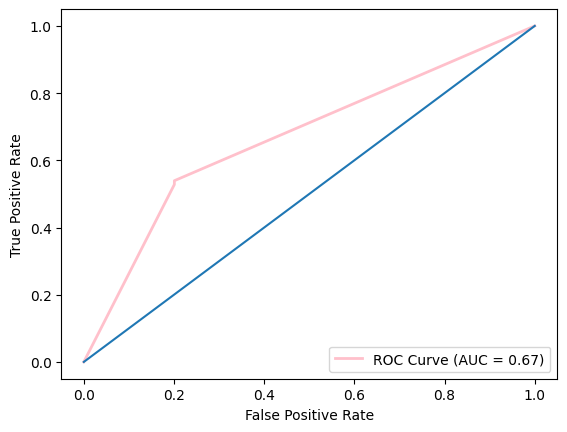

In [109]:

y_pred_prob = Decision_tree_balanced.predict_proba(x_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test_encoded, y_pred_prob)
DTree_roc_auc = auc(fpr, tpr)
 
mplot.plot(fpr, tpr, color='pink', lw=2, label=f'ROC Curve (AUC = {DTree_roc_auc:.2f})')
mplot.xlabel('False Positive Rate')
mplot.ylabel('True Positive Rate')
mplot.legend(loc = 'lower right')
mplot.plot([0,1], [0,1])
mplot.show()

## Support Vector Machine 

In [110]:
#Creating SVC Model
SvC_pipeline_balanced = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('feature_importance',selection),
    ('classifier', SVC(random_state=42,probability=True))
])

#Fitting/Training the model
SvC_pipeline_balanced.fit(x_train_resampled,y_train_resample)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipelines',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000028EE2F28FA0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'],...
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('feature_importance',
                 SelectKBest(k=40,
                             score_func=<function mutual_info_classif at 0x0000028ED8BE3D30>)),
                ('classifier', SVC(probability=True, random_state=42))])

In [111]:
#Evaluating the model
SVC_predict = SvC_pipeline.predict(x_test)

#Fitting/Training the model
Svc_Report = classification_report(y_test_encoded,SVC_predict)
print("Classification Report:\n", Svc_Report)

#print(confusion_matrix(y_test_encoded,SVC_predict))
pd.DataFrame((confusion_matrix(y_test_encoded,SVC_predict)))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87       742
           1       0.69      0.46      0.55       267

    accuracy                           0.80      1009
   macro avg       0.76      0.69      0.71      1009
weighted avg       0.79      0.80      0.79      1009



,0,1
0,686,56
1,145,122


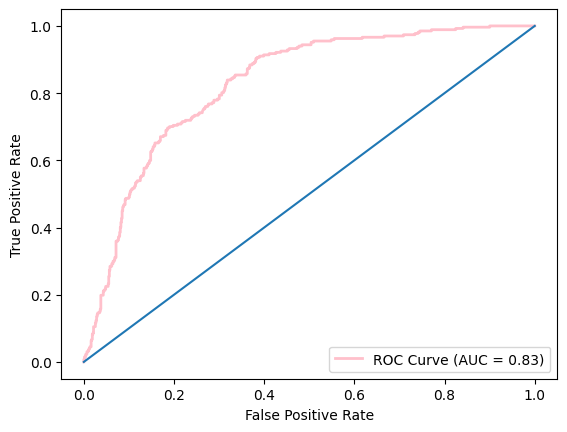

In [112]:
from sklearn.metrics import roc_curve, auc
y_pred_prob = SvC_pipeline_balanced.predict_proba(x_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test_encoded, y_pred_prob)
SVM_roc_auc = auc(fpr, tpr)
 
mplot.plot(fpr, tpr, color='pink', lw=2, label=f'ROC Curve (AUC = {SVM_roc_auc:.2f})')
mplot.xlabel('False Positive Rate')
mplot.ylabel('True Positive Rate')
mplot.legend(loc = 'lower right')
mplot.plot([0,1], [0,1])
mplot.show()

##  RandomForest Claasifier

In [113]:
#Creating RandomForest Model
RF_pipeline_balanced = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('feature_importance',selection),
    ('classifier', RandomForestClassifier(random_state=42))
])

#Fitting/Training the model
RF_pipeline_balanced .fit(x_train_resampled,y_train_resample)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipelines',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000028EE2F28FA0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'],...
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('feature_importance',
                 SelectKBest(k=40,
                             score_func=<function mutual_info_classif at 0x0000028ED8BE3D30>)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [114]:
#Evaluating the model
RF_predict = RF_pipeline_balanced.predict(x_test)

#Fitting/Training the model
RF_Report = classification_report(y_test_encoded,RF_predict)
print("Classification Report:\n", RF_Report)

#print(confusion_matrix(y_test_encoded,RF_predict))

pd.DataFrame((confusion_matrix(y_test_encoded,RF_predict)))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       742
           1       0.57      0.59      0.58       267

    accuracy                           0.77      1009
   macro avg       0.71      0.71      0.71      1009
weighted avg       0.78      0.77      0.77      1009



,0,1
0,623,119
1,110,157


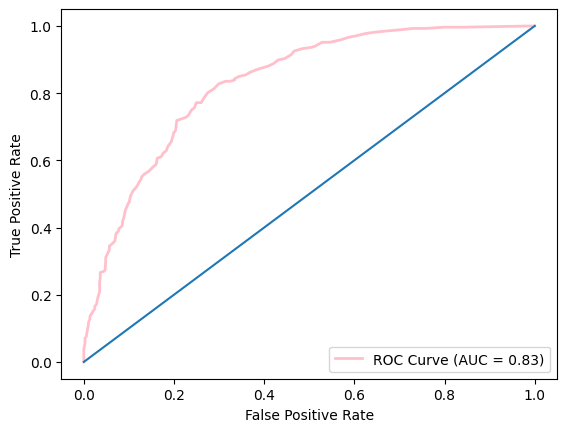

In [115]:

y_pred_prob = RF_pipeline_balanced.predict_proba(x_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test_encoded, y_pred_prob)
RF_roc_auc = auc(fpr, tpr)
 
mplot.plot(fpr, tpr, color='pink', lw=2, label=f'ROC Curve (AUC = {RF_roc_auc:.2f})')
mplot.xlabel('False Positive Rate')
mplot.ylabel('True Positive Rate')
mplot.legend(loc = 'lower right')
mplot.plot([0,1], [0,1])
mplot.show()

##  Logistic Regression

In [116]:
#Creating Logistic Regression Model 
LR_pipeline_balanced= Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('feature_importance',selection),
    ('classifier', LogisticRegression(random_state=42))
])

#Fitting/Training the model
LR_pipeline_balanced .fit(x_train_resampled,y_train_resample)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipelines',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000028EE2F28FA0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'],...
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('feature_importance',
                 SelectKBest(k=40,
                             score_func=<function mutual_info_classif at 0x0000028ED8BE3D30>)),
                ('classifier', LogisticRegression(random_state=42))])

In [117]:
#Evaluating the model
LR_predict = LR_pipeline_balanced.predict(x_test)

#Fitting/Training the model
LR_Report = classification_report(y_test_encoded,LR_predict)
print("Classification Report:\n", LR_Report)

#print(confusion_matrix(y_test_encoded,LR_predict))

pd.DataFrame((confusion_matrix(y_test_encoded,LR_predict)))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.71      0.80       742
           1       0.51      0.82      0.63       267

    accuracy                           0.74      1009
   macro avg       0.71      0.77      0.71      1009
weighted avg       0.81      0.74      0.76      1009



,0,1
0,529,213
1,48,219


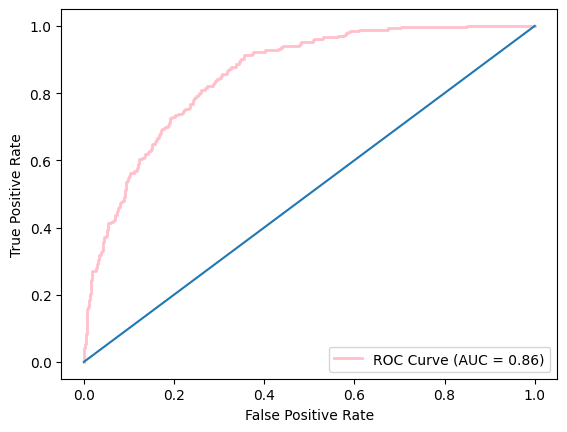

In [118]:
y_pred_prob = LR_pipeline_balanced.predict_proba(x_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test_encoded, y_pred_prob)
LR_roc_auc = auc(fpr, tpr)

LR_roc_curve_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': threshold})
 
mplot.plot(fpr, tpr, color='pink', lw=2, label=f'ROC Curve (AUC = {LR_roc_auc:.2f})')
mplot.xlabel('False Positive Rate')
mplot.ylabel('True Positive Rate')
mplot.legend(loc = 'lower right')
mplot.plot([0,1], [0,1])
mplot.show()

## Gradient Booster Classifier

In [119]:
#Creating Logistic Regression Model 
GB_pipeline_balanced = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('feature_importance',selection),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

#Fitting/Training the model
GB_pipeline_balanced .fit(x_train_resampled,y_train_resample)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipelines',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000028EE2F28FA0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'],...
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('feature_importance',
                 SelectKBest(k=40,
                             score_func=<function mutual_info_classif at 0x0000028ED8BE3D30>)),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [120]:
#Evaluating the model
GB_predict = GB_pipeline_balanced.predict(x_test)

#Fitting/Training the model
GB_Report = classification_report(y_test_encoded,GB_predict)

print("Classification Report:\n", GB_Report)


#print(confusion_matrix(y_test_encoded,LR_predict))

pd.DataFrame((confusion_matrix(y_test_encoded,GB_predict)))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.74      0.82       742
           1       0.53      0.81      0.64       267

    accuracy                           0.76      1009
   macro avg       0.72      0.77      0.73      1009
weighted avg       0.81      0.76      0.77      1009



,0,1
0,549,193
1,52,215


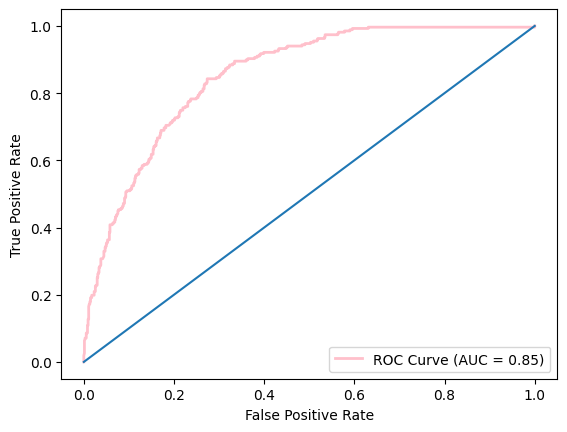

In [121]:
y_pred_prob = GB_pipeline_balanced.predict_proba(x_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test_encoded, y_pred_prob)
GB_roc_auc = auc(fpr, tpr)

GB_roc_curve_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': threshold})
 
mplot.plot(fpr, tpr, color='pink', lw=2, label=f'ROC Curve (AUC = {GB_roc_auc:.2f})')
mplot.xlabel('False Positive Rate')
mplot.ylabel('True Positive Rate')
mplot.legend(loc = 'lower right')
mplot.plot([0,1], [0,1])
mplot.show()

In [122]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
LR_roc_curve_df

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,inf
1,0.000000,0.003745,0.976869
2,0.000000,0.033708,0.957156
3,0.001348,0.033708,0.957044
4,0.001348,0.041199,0.953869
5,0.002695,0.041199,0.953575
6,0.002695,0.052434,0.946247
7,0.004043,0.052434,0.946235
8,0.004043,0.082397,0.936877
9,0.006739,0.082397,0.934290


In [ ]:
LR_matrix = pd.DataFrame((confusion_matrix(y_test_encoded,LR_predict)))
LR_matrix

,0,1
0,534,208
1,47,220


<Axes: >

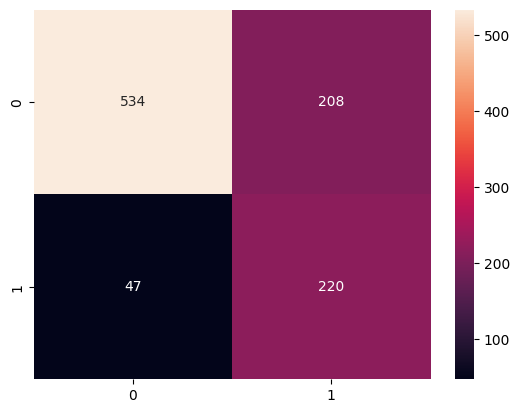

In [ ]:
#visualising confusion matrix
sns.heatmap(data= LR_matrix, annot=True, fmt='d')

In [ ]:
threshold =  0.473345
#creating a predicted probability
y_pred_proba = LR_pipeline_balanced.predict_proba(x_test)[:,1]

#setting a threshold
binary_prediction =(y_pred_proba > threshold)

#generating a new confusion matrix
threshold_matrix = confusion_matrix(y_test_encoded,binary_prediction)
threshold_matrix

array([[589, 153],
       [ 91, 176]], dtype=int64)

<Axes: >

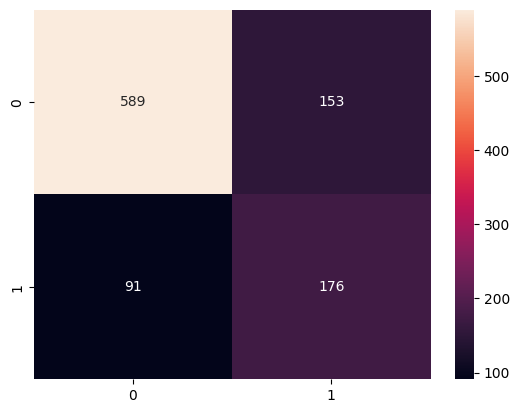

In [ ]:

sns.heatmap(data= threshold_matrix, annot=True, fmt='d')

In [124]:
#For Gradient booster model
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
GB_roc_curve_df

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,inf
1,0.000000,0.003745,0.940122
2,0.000000,0.007491,0.938009
3,0.000000,0.018727,0.936486
4,0.001348,0.026217,0.929939
5,0.001348,0.033708,0.925029
6,0.001348,0.041199,0.923486
7,0.001348,0.044944,0.923249
8,0.001348,0.063670,0.921197
9,0.002695,0.067416,0.920521


In [125]:
GB_matrix = pd.DataFrame((confusion_matrix(y_test_encoded,GB_predict)))
GB_matrix

,0,1
0,549,193
1,52,215


<Axes: >

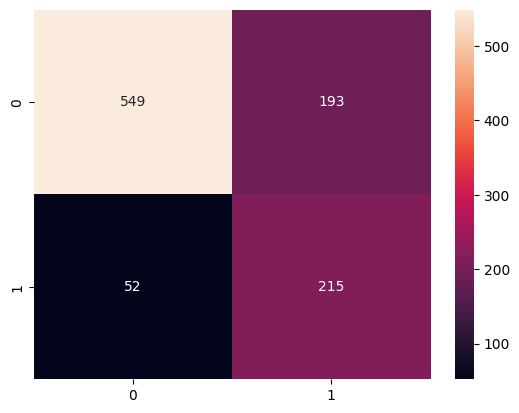

In [126]:
#visualising confusion matrix
sns.heatmap(data= GB_matrix, annot=True, fmt='d')

In [134]:
threshold = 0.485954
#creating a predicted probability
y1_pred_proba = GB_pipeline_balanced.predict_proba(x_test)[:,1]

#setting a threshold
binary_prediction =(y1_pred_proba > threshold)

#generating a new confusion matrix
threshold_matrix = confusion_matrix(y_test_encoded,binary_prediction)
threshold_matrix

array([[544, 198],
       [ 47, 220]], dtype=int64)

<Axes: >

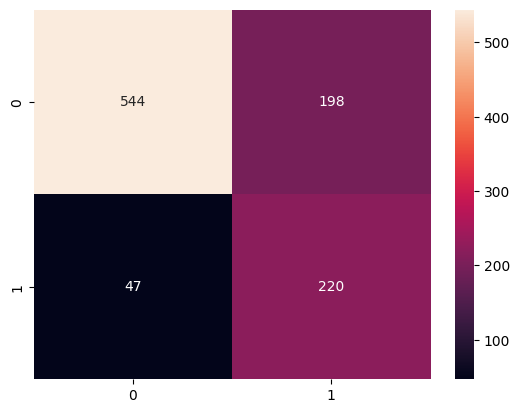

In [135]:
sns.heatmap(data= threshold_matrix, annot=True, fmt='d')

## Training Balance Dataset of best performing models

# Hyperparameter Tuning For Linear Regression Model

In [150]:
param_grid_lr = {
    'feature_importance__k': [5, 2, 1],
    'classifier__C': [0.1, 1.0, 10.0],  # Example values for the 'C' hyperparameter
    'classifier__penalty': ['l1', 'l2'],  # Example penalty types
    'classifier__solver': ['liblinear']  # Example solver
    # Add other valid hyperparameters for LogisticRegression here
}
grid_search_lr = GridSearchCV(
    LR_pipeline_balanced,
    param_grid=param_grid_lr,
    cv=5,
    scoring='f1'
)
 
grid_search_lr.fit(x_train, y_train_encoded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric_pipelines',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('log_transformation',
                                                                                          FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000028EE2F28FA0>>)),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         Index(['tenure', 'Mont...
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                                       ('feature_importance',
                                        SelectKBest(k=40,
                                                    score_func=<function mutual_info_classif at 0x0000028ED8BE3D30>)),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'classifier__C': [0.1, 1.0, 10.0],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear'],
                         'feature_importance__k': [5, 2, 1]},
             scoring='f1')

In [151]:
best_parameters_lr = grid_search_lr.best_params_
best_parameters_lr

{'classifier__C': 1.0,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear',
 'feature_importance__k': 5}

View Evaluation Report


In [152]:
best_estimator_lr = grid_search_lr.best_estimator_


test_accuracy = best_estimator_lr.score(x_test, y_test_encoded)
print("Test Accuracy", test_accuracy)

Test Accuracy 0.7898909811694748


# Hyperparameter Tuning For Gradient Boosting Model

In [153]:
param_grid_GB = {
    'classifier__n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
    'classifier__max_depth': [1, 32, 32],
    'classifier__min_samples_split': [0.1, 1.0, 10],
    'classifier__min_samples_leaf': [0.1, 0.5],
    'classifier__max_features': ['auto', 'sqrt', 'log2']
}

grid_search_GB = GridSearchCV(
    GB_pipeline_balanced,
    param_grid=param_grid_GB,
    cv=5,
    scoring='f1'
)

grid_search_GB.fit(x_train, y_train_encoded)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric_pipelines',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('log_transformation',
                                                                                          FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000028EE2F28FA0>>)),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         Index(['tenure', 'Mont...
                                                    score_func=<function mutual_info_classif at 0x0000028ED8BE3D30>)),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [1, 32, 32],
                         'classifier__max_features': ['auto', 'sqrt', 'log2'],
                         'classifier__min_samples_leaf': [0.1, 0.5],
                         'classifier__min_samples_split': [0.1, 1.0, 10],
                         'classifier__n_estimators': [1, 2, 4, 8, 16, 32, 64,
                                                      100, 200]},
             scoring='f1')

In [154]:
best_parameters_GB = grid_search_GB.best_params_
best_parameters_GB

{'classifier__max_depth': 32,
 'classifier__max_features': 'sqrt',
 'classifier__min_samples_leaf': 0.1,
 'classifier__min_samples_split': 10,
 'classifier__n_estimators': 100}

Evaluation Report


In [155]:
best_estimator_GB = grid_search_GB.best_estimator_


test_accuracy = best_estimator_GB.score(x_test, y_test_encoded)
print("Test Accuracy", test_accuracy)

Test Accuracy 0.7978196233894945


## Retraining Model with Best Parameters

In [156]:
#For Linear Regression
LR_pipeline_balanced.set_params(**best_parameters_lr)
LR_pipeline_balanced.fit(x_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipelines',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000028EE2F28FA0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'],...
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('feature_importance',
                 SelectKBest(k=5,
                             score_func=<function mutual_info_classif at 0x0000028ED8BE3D30>)),
                ('classifier',
                 LogisticRegression(penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [157]:
#For Gradient Boosting
GB_pipeline_balanced.set_params(**best_parameters_GB)
GB_pipeline_balanced.fit(x_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipelines',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000028EE2F28FA0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'],...
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('feature_importance',
                 SelectKBest(k=5,
                             score_func=<function mutual_info_classif at 0x0000028ED8BE3D30>)),
                ('classifier',
                 GradientBoostingClassifier(max_depth=32, max_features='sqrt',
                                            min_samples_leaf=0.1,
                                            min_samples_split=10,
                                            random_state=42))])

## Model Persistence

In [158]:
import joblib

joblib.dump(LR_pipeline_balanced, './models/finished_model.joblib')

joblib.dump(GB_pipeline_balanced, './models/Gradient_boosting_model.joblib' )

joblib.dump(Label_encoder, './models/encoder.joblib')


['./models/encoder.joblib']

# Load Test Dataset

In [159]:
# Load the new test data from Excel
test_data = pd.read_excel('Telco-churn-second-2000.xlsx')
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [160]:
# viewing column names
test_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [161]:
# Drop 'customerID' column
test_data.drop('customerID', axis=1, inplace=True)

# Verify changes
test_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [162]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2000 non-null   object 
 1   SeniorCitizen     2000 non-null   int64  
 2   Partner           2000 non-null   object 
 3   Dependents        2000 non-null   object 
 4   tenure            2000 non-null   int64  
 5   PhoneService      2000 non-null   object 
 6   MultipleLines     2000 non-null   object 
 7   InternetService   2000 non-null   object 
 8   OnlineSecurity    2000 non-null   object 
 9   OnlineBackup      2000 non-null   object 
 10  DeviceProtection  2000 non-null   object 
 11  TechSupport       2000 non-null   object 
 12  StreamingTV       2000 non-null   object 
 13  StreamingMovies   2000 non-null   object 
 14  Contract          2000 non-null   object 
 15  PaperlessBilling  2000 non-null   object 
 16  PaymentMethod     2000 non-null   object 


In [163]:
# Changing the datatype of 'TotalCharges' to a float
test_data['TotalCharges'] = pd.to_numeric(test_data['TotalCharges'], errors='coerce')

In [164]:
# Loading the pre-trained logistic regression pipeline and encoder models
LR_pipeline_balanced_2 = joblib.load('./models/finished_model.joblib')
encoder = joblib.load('./models/encoder.joblib')

# Making predictions using the loaded logistic regression pipeline on test data
prediction = LR_pipeline_balanced_2.predict(test_data)

# Defining a threshold
threshold = 0.473345

y_pred_proba = LR_pipeline_balanced_2.predict_proba(test_data)[:, 1]

binary_prediction_2 = (y_pred_proba >= threshold)

# Printing the predictions
print(binary_prediction_2)

[ True False False ... False False False]


In [165]:
# Adding the predictions as a new column to the test_data DataFrame
test_data['Churn'] = binary_prediction_2

In [166]:
# Printing the DataFrame with predictions
test_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,True
1,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80,False
2,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,False
3,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,False
4,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,True


In [167]:
#Replacing True/False with 'Yes'/'No' while iterating through each column 
test_data['Churn'] = test_data['Churn'].replace({True: 'Yes', False: 'No'})

test_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,Yes
1,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80,No
2,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,No
3,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,No
4,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,Yes


In [168]:
# Counting number of each unique values in the 'Churn' column
test_data['Churn'].value_counts()

Churn
No     1567
Yes     433
Name: count, dtype: int64

* The number of customers who chunred predicted by the model is 433 while that of customers who did not churn is 1567 using the linear regression model.

In [169]:
# Loading the pre-trained logistic regression pipeline and encoder models
GB_pipeline_balanced_2 = joblib.load('./models/Gradient_boosting_model.joblib')
encoder = joblib.load('./models/encoder.joblib')

# Making predictions using the loaded logistic regression pipeline on test data
GB_prediction = GB_pipeline_balanced_2.predict(test_data)

# Defining a threshold
threshold = 0.485954

y_pred_proba2 = LR_pipeline_balanced_2.predict_proba(test_data)[:, 1]

binary_prediction_GB = (y_pred_proba2 >= threshold)

# Printing the predictions
print(binary_prediction_GB)

[ True False False ... False False False]


In [170]:
# Adding the predictions as a new column to the test_data DataFrame
test_data['Churn'] = binary_prediction_GB

In [171]:
# Printing the DataFrame with predictions
test_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,True
1,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80,False
2,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,False
3,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,False
4,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,True


In [172]:
#Replacing True/False with 'Yes'/'No' while iterating through each column 
test_data['Churn'] = test_data['Churn'].replace({True: 'Yes', False: 'No'})

test_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,Yes
1,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80,No
2,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,No
3,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,No
4,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,Yes


In [173]:
# Counting number of each unique values in the 'Churn' column
test_data['Churn'].value_counts()

Churn
No     1591
Yes     409
Name: count, dtype: int64

* The number of customers who chunred predicted by the gradient boosting model is 409 while that of customers who did not churn is 1591. This indicates that the gradient boosting model will perform better tan the linear regression model.